# Data mining for Sentinel-2 satellite

Main references:
 - https://www.matecdev.com/posts/landsat-sentinel-aws-s3-python.html
 - https://notebook.community/gonzmg88/gonzmg88.github.io/blog/notebooks/rasterio_conversions
 - https://www.streambatch.io/knowledge/ndvi-from-sentinel-2-imagery-using-stac

## Field data (id, polygon, time range)

In [1]:
from datetime import datetime

In [2]:
field_id = 288307
geometry = { "type": "Polygon", "coordinates": [ ((34.86581365600006,31.736566992000064),(34.86588363100003,31.737253938000038),(34.86593030500006,31.73731417600004),(34.86601523500008,31.737405483000032),(34.866172763000066,31.73746237200004),(34.86675705600004,31.737392877000048),(34.866915,31.737335003000055),(34.86704964200004,31.73723699100003),(34.867209770000045,31.737164549000056),(34.867252473000065,31.737144624000052),(34.86724662000006,31.736995233000073),(34.86727479100006,31.736867793000044),(34.86737375700005,31.736614846000066),(34.86743010500004,31.736358143000075),(34.867419883000025,31.736237888000062),(34.86738434700004,31.736044700000036),(34.86728910200003,31.73585864000006),(34.867144465000024,31.73577446200005),(34.866837909000026,31.73566981600004),(34.86650729100006,31.73573452000005),(34.866494430000046,31.735754523000026),(34.86592715000006,31.735836815000027),(34.86585128400003,31.73618454600006),(34.865850727000065,31.736337563000063),(34.86581365600006,31.736566992000064)) ] }
timeRange = '2021-01-01/' + datetime.today().strftime('%Y-%m-%d')

## STAC client

In [3]:
# pip install pystac-client

In [4]:
import pystac_client

In [5]:
sentinel_search_url = "https://earth-search.aws.element84.com/v1"
sentinel_stac_client = pystac_client.Client.open(sentinel_search_url)
items = sentinel_stac_client.search(
       intersects=geometry,
       datetime = timeRange,
       collections=["sentinel-2-l2a"]).item_collection()
len(items)

179

In [6]:
items

id: S2B_36SXA_20230614_0_L2A
"bbox: [34.053486633852216, 31.527683453826633, 35.233541815684475, 32.53283751655785]"
created: 2023-06-14T14:51:22.056Z
platform: sentinel-2b
constellation: sentinel-2
instruments: ['msi']
eo:cloud_cover: 2.214256
proj:epsg: 32636
mgrs:utm_zone: 36
mgrs:latitude_band: S
mgrs:grid_square: XA


In [7]:
for item in items.to_dict()['features']:
    print('id:', item['id'], 'eo:cloud_cover:', item['properties']['eo:cloud_cover'])

id: S2B_36SXA_20230614_0_L2A eo:cloud_cover: 2.214256
id: S2A_36SXA_20230609_0_L2A eo:cloud_cover: 92.772394
id: S2B_36SXA_20230604_0_L2A eo:cloud_cover: 8.086745
id: S2A_36SXA_20230530_0_L2A eo:cloud_cover: 0.71441
id: S2B_36SXA_20230525_0_L2A eo:cloud_cover: 1.343685
id: S2A_36SXA_20230520_0_L2A eo:cloud_cover: 29.348728
id: S2B_36SXA_20230515_0_L2A eo:cloud_cover: 0.877651
id: S2A_36SXA_20230510_0_L2A eo:cloud_cover: 0.157212
id: S2B_36SXA_20230505_0_L2A eo:cloud_cover: 2.419093
id: S2A_36SXA_20230430_0_L2A eo:cloud_cover: 40.58437
id: S2B_36SXA_20230425_0_L2A eo:cloud_cover: 3.112637
id: S2A_36SXA_20230420_0_L2A eo:cloud_cover: 40.571716
id: S2B_36SXA_20230415_0_L2A eo:cloud_cover: 86.221915
id: S2B_36SXA_20230405_0_L2A eo:cloud_cover: 7.665128
id: S2A_36SXA_20230331_0_L2A eo:cloud_cover: 35.255873
id: S2B_36SXA_20230326_0_L2A eo:cloud_cover: 46.232146
id: S2A_36SXA_20230321_0_L2A eo:cloud_cover: 69.160187
id: S2B_36SXA_20230316_0_L2A eo:cloud_cover: 1.21262
id: S2B_36SXA_20230306_

### Creating AWS Session

In [8]:
# pip install rasterio[s3]

In [9]:
import os
import boto3
import rasterio as rio

# os.environ['CURL_CA_BUNDLE'] = '/etc/ssl/certs/ca-certificates.crt'

print("Creating AWS Session")
aws_session = rio.session.AWSSession(boto3.Session(), requester_pays=True)

Creating AWS Session


### Tile info

In [10]:
import rasterio as rio
import rasterio.plot as plot
from rasterio.plot import show
from rasterio import mask
from rasterio import warp
from urllib.request import urlopen
import json

In [11]:
info = items[0].to_dict()['properties']

for key in info.keys():
    print(str(key) + ': ' + str(info[key]) + '\n')

created: 2023-06-14T14:51:22.056Z

platform: sentinel-2b

constellation: sentinel-2

instruments: ['msi']

eo:cloud_cover: 2.214256

proj:epsg: 32636

mgrs:utm_zone: 36

mgrs:latitude_band: S

mgrs:grid_square: XA

grid:code: MGRS-36SXA

view:sun_azimuth: 115.081447088942

view:sun_elevation: 72.1662903810972

s2:degraded_msi_data_percentage: 0.0213

s2:nodata_pixel_percentage: 0

s2:saturated_defective_pixel_percentage: 0

s2:dark_features_percentage: 0.000617

s2:cloud_shadow_percentage: 0.078666

s2:vegetation_percentage: 5.85518

s2:not_vegetated_percentage: 36.979377

s2:water_percentage: 54.824704

s2:unclassified_percentage: 0.0472

s2:medium_proba_clouds_percentage: 1.818289

s2:high_proba_clouds_percentage: 0.395878

s2:thin_cirrus_percentage: 9e-05

s2:snow_ice_percentage: 0

s2:product_type: S2MSI2A

s2:processing_baseline: 05.09

s2:product_uri: S2B_MSIL2A_20230614T081609_N0509_R121_T36SXA_20230614T101359.SAFE

s2:generation_time: 2023-06-14T10:13:59.000000Z

s2:datatake_id

C:\ProgramData\Anaconda3\lib\site-packages\rasterio\__init__.py:334: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


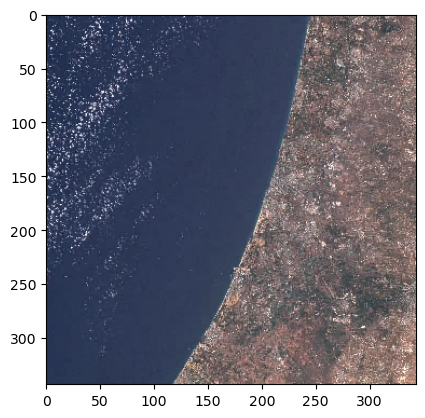

In [12]:
thumbnail = rio.open(items[0].assets['thumbnail'].href)
show(thumbnail.read(), transform=thumbnail.transform);

### Scene Classification Map

Scene classification was developed to distinguish between cloudy pixels, clear pixels and water pixels of Sentinel-2 data and is a result of ESA’s Scene classification algorithm. Twelve different classifications are provided including classes of clouds, vegetation, soils/desert, water and snow. It does not constitute a land cover classification map in a strict sense.

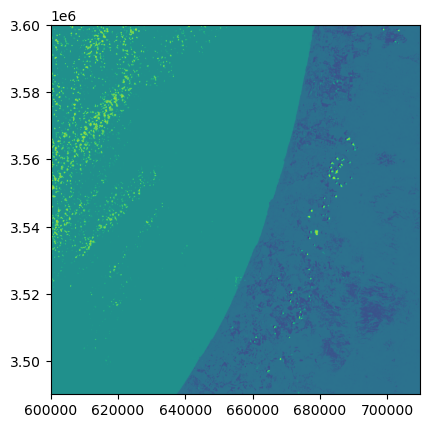

In [13]:
scene_clasification_layer = rio.open(items[0].assets['scl'].href)
show(scene_clasification_layer.read(), transform=scene_clasification_layer.transform);

In [14]:
scene_clasification_layer.read()

array([[[6, 6, 6, ..., 5, 5, 5],
        [6, 6, 6, ..., 5, 5, 5],
        [6, 6, 6, ..., 5, 5, 5],
        ...,
        [6, 6, 6, ..., 5, 5, 5],
        [6, 6, 6, ..., 5, 5, 5],
        [6, 6, 6, ..., 5, 5, 5]]], dtype=uint8)

### Crop field polygon out of tile

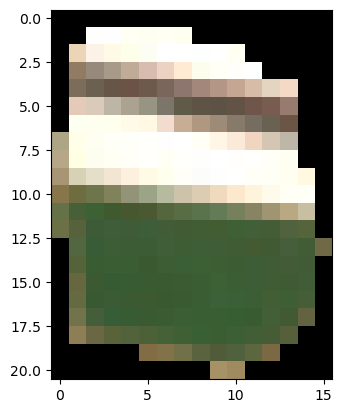

In [15]:
rgb = rio.open(items[0].assets['visual'].href)
rgb_roi_polygon_src_coords = warp.transform_geom({'init': 'epsg:4326'}, rgb.crs, geometry)
rgb, rgb_out_transform = mask.mask(rgb, [rgb_roi_polygon_src_coords], crop=True)
show(rgb);

### Crop field polygon out of the Scene Clasification Layer (SCL), which in particular includes cloud detection

In [16]:
import numpy as np

In [17]:
scl_s3 = rio.open(items[0].assets['scl'].href)
scl_roi_polygon_src_coords = warp.transform_geom({'init': 'epsg:4326'}, scl_s3.crs, geometry)
scl, scl_out_transform = mask.mask(scl_s3, [scl_roi_polygon_src_coords], crop=True)
scl[0].shape

(11, 9)

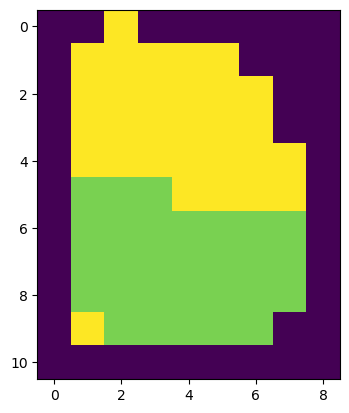

In [18]:
show(scl[0]);

In [19]:
scl_legend = {0: 'No Data (Missing data)', 1: 'Saturated or defective pixel', 2: 'Topographic casted shadows',
              3: 'Cloud shadows', 4: 'Vegetation', 5: 'Not-vegetated', 6: 'Water', 7: 'Unclassified',
              8: 'Cloud medium probability', 9: 'Cloud high probability', 10: 'Thin cirrus', 11: 'Snow or ice'}

In [20]:
scl[0]

array([[0, 0, 5, 0, 0, 0, 0, 0, 0],
       [0, 5, 5, 5, 5, 5, 0, 0, 0],
       [0, 5, 5, 5, 5, 5, 5, 0, 0],
       [0, 5, 5, 5, 5, 5, 5, 0, 0],
       [0, 5, 5, 5, 5, 5, 5, 5, 0],
       [0, 4, 4, 4, 5, 5, 5, 5, 0],
       [0, 4, 4, 4, 4, 4, 4, 4, 0],
       [0, 4, 4, 4, 4, 4, 4, 4, 0],
       [0, 4, 4, 4, 4, 4, 4, 4, 0],
       [0, 5, 4, 4, 4, 4, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [21]:
unique, counts = np.unique(scl, return_counts=True)
scl_percent = dict()

if bool(scl_legend.keys() & set(unique)):
    total_pixels = np.count_nonzero(scl)
    scl_percent['Total pixels'] = total_pixels
    for i, val in enumerate(set(unique)):
        if val != 0:
            scl_percent[scl_legend[val]] = counts[i] / total_pixels

In [22]:
scl_percent

{'Total pixels': 59,
 'Vegetation': 0.4915254237288136,
 'Not-vegetated': 0.5084745762711864}

### Defining NDVI

In [23]:
def NDVI(nir, red):
    ndvi = (nir - red) / (nir + red)
    ndvi[ndvi == np.inf] = np.NaN
    ndvi[ndvi == -np.inf] = np.NaN
    return {"max": np.nanmax(ndvi), "mean": np.nanmean(ndvi), "median": np.nanmedian(ndvi), "min": np.nanmin(ndvi), "std": np.nanstd(ndvi)}

### Defining SCL

In [24]:
def SCL(scl):
    unique, counts = np.unique(scl, return_counts=True)
    scl_percent = dict()

    if bool(scl_legend.keys() & set(unique)):
        total_pixels = np.count_nonzero(scl)
        scl_percent['Total pixels'] = total_pixels
        for i, val in enumerate(set(unique)):
            if val != 0:
                scl_percent[scl_legend[val]] = counts[i] / total_pixels
        return scl_percent
    else:
        return None

## Running on items and creating satellite data (NDVI and SCL) for one plot by time range

In [25]:
import scipy.ndimage
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from rasterio import mask
from rasterio import warp
import rasterio.plot as plot
import rasterio as rio
import json

np.seterr(divide='ignore', invalid='ignore')
satellite = {'date': [], 'field_id': [], 'statistics': []}

for i,item in tqdm(enumerate(items)):
    red_s3 = rio.open(item.assets['red'].href)
    nir_s3 = rio.open(item.assets['nir'].href)
    scl_s3 = rio.open(item.assets['scl'].href)

    red_roi_polygon_src_coords = warp.transform_geom({'init': 'epsg:4326'}, red_s3.crs, geometry)
    nir_roi_polygon_src_coords = warp.transform_geom({'init': 'epsg:4326'}, nir_s3.crs, geometry)
    scl_roi_polygon_src_coords = warp.transform_geom({'init': 'epsg:4326'}, scl_s3.crs, geometry)

    red, red_out_transform = mask.mask(red_s3, [red_roi_polygon_src_coords], crop=True)
    nir, nir_out_transform = mask.mask(nir_s3, [nir_roi_polygon_src_coords], crop=True)
    scl, scl_out_transform = mask.mask(scl_s3, [scl_roi_polygon_src_coords], crop=True)
    
    date = item.properties['datetime'][0:10]
    print("Field number " + str(i + 1) + "/" + str(len(items)) + " " + date + " id: " + str(int(field_id)))
    
    stats = {'NDVI': NDVI(nir[0], red[0]), 
             'SCL': SCL(scl[0])}
    
    print('NDVI', stats['NDVI'])
    print('SCL', stats['SCL'])
    
    satellite['date'].append(date)
    satellite['field_id'].append(int(field_id))
    satellite['statistics'].append(json.dumps(stats))

1it [00:30, 30.61s/it]

Field number 1/179 2023-06-14 id: 288307
NDVI {'max': 0.768236582694414, 'mean': 0.3802276896246503, 'median': 0.3795683353329554, 'min': 0.01139287026828372, 'std': 0.3155871306208903}
SCL {'Total pixels': 59, 'Vegetation': 0.4915254237288136, 'Not-vegetated': 0.5084745762711864}


2it [00:49, 23.55s/it]

Field number 2/179 2023-06-09 id: 288307
NDVI {'max': 0.027221366204417053, 'mean': 0.020721556286466755, 'median': 0.020759514959284686, 'min': 0.013712544438801422, 'std': 0.00243825486874267}
SCL {'Total pixels': 59, 'Cloud medium probability': 1.0}


3it [01:15, 24.88s/it]

Field number 3/179 2023-06-04 id: 288307
NDVI {'max': 0.7571240683910565, 'mean': 0.40604450985538937, 'median': 0.38221891814486886, 'min': 0.11214410226612434, 'std': 0.2604587072029698}
SCL {'Total pixels': 59, 'Vegetation': 0.4745762711864407, 'Not-vegetated': 0.5254237288135594}


4it [01:41, 25.30s/it]

Field number 4/179 2023-05-30 id: 288307
NDVI {'max': 0.7730822232429949, 'mean': 0.4193420825739864, 'median': 0.40817834067980596, 'min': 0.10820451843043995, 'std': 0.265782421678813}
SCL {'Total pixels': 59, 'Vegetation': 0.4915254237288136, 'Not-vegetated': 0.5084745762711864}


5it [02:07, 25.66s/it]

Field number 5/179 2023-05-25 id: 288307
NDVI {'max': 0.7671878878133532, 'mean': 0.42961445920836205, 'median': 0.38200916881472435, 'min': 0.1296395911780527, 'std': 0.252207364356453}
SCL {'Total pixels': 59, 'Vegetation': 0.4745762711864407, 'Not-vegetated': 0.5254237288135594}


6it [02:24, 22.47s/it]

Field number 6/179 2023-05-20 id: 288307
NDVI {'max': 0.774839909109688, 'mean': 0.4380964299086228, 'median': 0.41309794864532157, 'min': 0.11200807265388496, 'std': 0.25447110205245776}
SCL {'Total pixels': 59, 'Vegetation': 0.5084745762711864, 'Not-vegetated': 0.4915254237288136}


7it [02:41, 20.71s/it]

Field number 7/179 2023-05-15 id: 288307
NDVI {'max': 0.733862959285005, 'mean': 0.45183373600069404, 'median': 0.41392014406491473, 'min': 0.15808383233532936, 'std': 0.2096695431285593}
SCL {'Total pixels': 59, 'Vegetation': 0.4745762711864407, 'Not-vegetated': 0.5254237288135594}


8it [02:57, 19.27s/it]

Field number 8/179 2023-05-10 id: 288307
NDVI {'max': 0.7173333333333334, 'mean': 0.40808340286742034, 'median': 0.3779986901932578, 'min': 0.13027522935779817, 'std': 0.21726341710158723}
SCL {'Total pixels': 59, 'Vegetation': 0.4745762711864407, 'Not-vegetated': 0.5254237288135594}


9it [03:14, 18.55s/it]

Field number 9/179 2023-05-05 id: 288307
NDVI {'max': 0.6402055968018275, 'mean': 0.35883941815932485, 'median': 0.33367916379552975, 'min': 0.12158808933002481, 'std': 0.19662045384608626}
SCL {'Total pixels': 59, 'Vegetation': 0.423728813559322, 'Not-vegetated': 0.576271186440678}


10it [03:31, 18.01s/it]

Field number 10/179 2023-04-30 id: 288307
NDVI {'max': 0.532777115613826, 'mean': 0.2942079889396764, 'median': 0.2587836557361387, 'min': 0.026225769669327253, 'std': 0.1628229620039259}
SCL {'Total pixels': 59, 'Cloud shadows': 0.8983050847457628, 'Unclassified': 0.1016949152542373}


11it [03:44, 16.58s/it]

Field number 11/179 2023-04-25 id: 288307
NDVI {'max': 0.6799007444168734, 'mean': 0.355084752478258, 'median': 0.28565844176251826, 'min': 0.11036036036036036, 'std': 0.216311946269523}
SCL {'Total pixels': 59, 'Vegetation': 0.4406779661016949, 'Not-vegetated': 0.559322033898305}


12it [04:08, 18.67s/it]

Field number 12/179 2023-04-20 id: 288307
NDVI {'max': 3.358490566037736, 'mean': 2.508992399748658, 'median': 3.0298049746030964, 'min': 0.0, 'std': 1.170880813577051}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


13it [04:25, 18.44s/it]

Field number 13/179 2023-04-15 id: 288307
NDVI {'max': 0.5649895178197065, 'mean': 0.34150021807400865, 'median': 0.31968235610899476, 'min': 0.1504719600222099, 'std': 0.10686549130833933}
SCL {'Total pixels': 59, 'Thin cirrus': 1.0}


14it [04:39, 17.03s/it]

Field number 14/179 2023-04-05 id: 288307
NDVI {'max': 0.45463559742191373, 'mean': 0.2943444451449589, 'median': 0.25855369941304546, 'min': 0.15375, 'std': 0.0791992265467531}
SCL {'Total pixels': 59, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.3728813559322034, 'Unclassified': 0.6101694915254238}


15it [04:56, 16.81s/it]

Field number 15/179 2023-03-31 id: 288307
NDVI {'max': 0.47608600263273365, 'mean': 0.24179918937029699, 'median': 0.2150619734239299, 'min': 0.1253731343283582, 'std': 0.08941598181310864}
SCL {'Total pixels': 59, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.5084745762711864, 'Unclassified': 0.4745762711864407}


16it [05:10, 16.03s/it]

Field number 16/179 2023-03-26 id: 288307
NDVI {'max': 0.19256401262714837, 'mean': 0.07918611665532128, 'median': 0.07751864626265392, 'min': 0.02158273381294964, 'std': 0.024673642372117076}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


17it [05:23, 15.10s/it]

Field number 17/179 2023-03-21 id: 288307
NDVI {'max': 0.05220338983050848, 'mean': 0.03674246880346952, 'median': 0.03626581683901692, 'min': 0.026334026334026334, 'std': 0.005068968700884548}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


18it [05:38, 15.08s/it]

Field number 18/179 2023-03-16 id: 288307
NDVI {'max': 0.5918121613485852, 'mean': 0.2292440221974189, 'median': 0.20318635008736768, 'min': 0.08868501529051988, 'std': 0.10755422209204572}
SCL {'Total pixels': 59, 'Vegetation': 0.03389830508474576, 'Not-vegetated': 0.1864406779661017, 'Unclassified': 0.7796610169491526}


19it [06:05, 18.75s/it]

Field number 19/179 2023-03-06 id: 288307
NDVI {'max': 0.20886668748048703, 'mean': 0.10059295864549016, 'median': 0.1006468478510091, 'min': 0.05732484076433121, 'std': 0.027067838111644846}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


20it [06:35, 22.24s/it]

Field number 20/179 2023-03-01 id: 288307
NDVI {'max': 0.4375644994840041, 'mean': 0.17993815028033555, 'median': 0.17834525083526598, 'min': 0.11286843997124371, 'std': 0.04018470293367107}
SCL {'Total pixels': 59, 'Not-vegetated': 1.0}


21it [07:03, 23.94s/it]

Field number 21/179 2023-02-24 id: 288307
NDVI {'max': 0.24489795918367346, 'mean': 0.13210582087917777, 'median': 0.12838485120320145, 'min': 0.02066115702479339, 'std': 0.041798291702933935}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


22it [07:37, 26.80s/it]

Field number 22/179 2023-02-14 id: 288307
NDVI {'max': 0.3542319749216301, 'mean': 0.16728957624050367, 'median': 0.16118247388481438, 'min': 0.09104046242774566, 'std': 0.03946906041663374}
SCL {'Total pixels': 59, 'Not-vegetated': 1.0}


23it [07:59, 25.44s/it]

Field number 23/179 2023-02-09 id: 288307
NDVI {'max': 0.4084507042253521, 'mean': 0.3168671608973236, 'median': 0.31494633469056643, 'min': 0.2447176334998079, 'std': 0.02499334724467521}
SCL {'Total pixels': 59, 'Cloud medium probability': 0.9830508474576272, 'Thin cirrus': 0.01694915254237288}


24it [08:28, 26.53s/it]

Field number 24/179 2023-02-04 id: 288307
NDVI {'max': 0.033718244803695153, 'mean': 0.017562462321978542, 'median': 0.017873544327326685, 'min': 0.0, 'std': 0.0069325188676927635}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


25it [09:04, 29.28s/it]

Field number 25/179 2023-01-30 id: 288307
NDVI {'max': 0.43405889884763127, 'mean': 0.26655933327024406, 'median': 0.2652635259919789, 'min': 0.12471131639722864, 'std': 0.04659576414437718}
SCL {'Total pixels': 59, 'Cloud shadows': 1.0}


26it [09:48, 33.71s/it]

Field number 26/179 2023-01-25 id: 288307
NDVI {'max': 0.40308988764044945, 'mean': 0.22529267712764298, 'median': 0.22410791032673125, 'min': 0.15396113602391628, 'std': 0.02973938728491986}
SCL {'Total pixels': 59, 'Not-vegetated': 1.0}


27it [10:27, 35.29s/it]

Field number 27/179 2023-01-20 id: 288307
NDVI {'max': 0.47288912867547883, 'mean': 0.25412525234941424, 'median': 0.241374492090692, 'min': 0.19612837493632196, 'std': 0.04293111581472188}
SCL {'Total pixels': 59, 'Not-vegetated': 1.0}


28it [11:00, 34.76s/it]

Field number 28/179 2023-01-15 id: 288307
NDVI {'max': 0.45993515516442796, 'mean': 0.3015926949957437, 'median': 0.29818628670980585, 'min': 0.190625, 'std': 0.04686679885266311}
SCL {'Total pixels': 59, 'Thin cirrus': 0.06779661016949153, 'Not-vegetated': 0.9322033898305084}


29it [11:15, 28.79s/it]

Field number 29/179 2023-01-10 id: 288307
NDVI {'max': 0.5358592692828146, 'mean': 0.30814641773146556, 'median': 0.2966330239647879, 'min': 0.20855614973262032, 'std': 0.05825799437371307}
SCL {'Total pixels': 59, 'Not-vegetated': 1.0}


30it [11:30, 24.56s/it]

Field number 30/179 2023-01-05 id: 288307
NDVI {'max': 0.4216439976345358, 'mean': 0.25209974920762723, 'median': 0.2461742446307969, 'min': 0.1302475780409042, 'std': 0.0528184845458238}
SCL {'Total pixels': 59, 'Cloud shadows': 0.1016949152542373, 'Not-vegetated': 0.8983050847457628}


31it [11:45, 21.63s/it]

Field number 31/179 2022-12-31 id: 288307
NDVI {'max': 0.4458898422363687, 'mean': 0.2863512650551632, 'median': 0.2876151031101618, 'min': 0.20722135007849293, 'std': 0.049009145231843396}
SCL {'Total pixels': 59, 'Not-vegetated': 1.0}


32it [11:58, 19.28s/it]

Field number 32/179 2022-12-26 id: 288307
NDVI {'max': 0.026214340786430222, 'mean': 0.01712523550114841, 'median': 0.017187594414275958, 'min': 0.010852713178294573, 'std': 0.0024660585322209016}
SCL {'Total pixels': 59, 'Cloud medium probability': 1.0}


33it [12:38, 25.41s/it]

Field number 33/179 2022-12-21 id: 288307
NDVI {'max': 12.922651933701658, 'mean': 2.6305817875243074, 'median': 0.07844119069858464, 'min': 0.0, 'std': 4.308987291602277}
SCL {'Total pixels': 59, 'Cloud medium probability': 0.2711864406779661, 'Cloud high probability': 0.7288135593220338}


34it [12:56, 23.21s/it]

Field number 34/179 2022-12-16 id: 288307
NDVI {'max': 0.39512774806892453, 'mean': 0.2942793550643313, 'median': 0.2834675277672021, 'min': 0.18065003779289493, 'std': 0.053167987899290114}
SCL {'Total pixels': 59, 'Not-vegetated': 1.0}


35it [13:15, 21.81s/it]

Field number 35/179 2022-12-11 id: 288307
NDVI {'max': 0.4261241970021413, 'mean': 0.3454857535079285, 'median': 0.35030302137989294, 'min': 0.1812274368231047, 'std': 0.03622702776925574}
SCL {'Total pixels': 59, 'Not-vegetated': 1.0}


36it [13:33, 20.59s/it]

Field number 36/179 2022-12-06 id: 288307
NDVI {'max': 8.85590465872156, 'mean': 1.0815426447771772, 'median': 0.04322469885096773, 'min': 0.0004710315591144607, 'std': 2.2474407587599217}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


37it [13:47, 18.71s/it]

Field number 37/179 2022-11-26 id: 288307
NDVI {'max': 5.758523725834798, 'mean': 0.2247146840421538, 'median': 0.0334028127983475, 'min': 0.0009466708740927738, 'std': 0.9981435118496249}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


38it [14:01, 17.27s/it]

Field number 38/179 2022-11-21 id: 288307
NDVI {'max': 0.37493606138107416, 'mean': 0.29545079200244906, 'median': 0.3016413428087181, 'min': 0.1575492341356674, 'std': 0.04089424200996853}
SCL {'Total pixels': 59, 'Thin cirrus': 1.0}


39it [14:17, 16.89s/it]

Field number 39/179 2022-11-16 id: 288307
NDVI {'max': 0.5072463768115942, 'mean': 0.4386923618522321, 'median': 0.4599637909982738, 'min': 0.14361702127659576, 'std': 0.06036697821016028}
SCL {'Total pixels': 59, 'Not-vegetated': 0.7796610169491526, 'Unclassified': 0.22033898305084745}


40it [14:31, 16.09s/it]

Field number 40/179 2022-11-11 id: 288307
NDVI {'max': 0.518095238095238, 'mean': 0.4513437075684426, 'median': 0.47349340658900607, 'min': 0.12073945696129405, 'std': 0.06660597391839923}
SCL {'Total pixels': 59, 'Not-vegetated': 1.0}


41it [14:46, 15.64s/it]

Field number 41/179 2022-11-06 id: 288307
NDVI {'max': 0.48014018691588783, 'mean': 0.41268828860825646, 'median': 0.43251203455815, 'min': 0.1645021645021645, 'std': 0.05900048190185301}
SCL {'Total pixels': 59, 'Not-vegetated': 0.288135593220339, 'Unclassified': 0.711864406779661}


42it [15:03, 16.06s/it]

Field number 42/179 2022-11-01 id: 288307
NDVI {'max': 0.5644637053087758, 'mean': 0.473622910877345, 'median': 0.5029838800542382, 'min': 0.145329967544176, 'std': 0.0808441835002596}
SCL {'Total pixels': 59, 'Vegetation': 0.11864406779661017, 'Not-vegetated': 0.8813559322033898}


43it [15:17, 15.55s/it]

Field number 43/179 2022-10-27 id: 288307
NDVI {'max': 0.5108091414453366, 'mean': 0.44167395807394183, 'median': 0.46241507237172874, 'min': 0.17622739018087855, 'std': 0.0630193043026082}
SCL {'Total pixels': 59, 'Not-vegetated': 1.0}


44it [15:42, 18.40s/it]

Field number 44/179 2022-10-22 id: 288307
NDVI {'max': 6.266181539639985, 'mean': 0.15343307386878804, 'median': 0.06354906027386673, 'min': 0.00031635558367605187, 'std': 0.7096231121012073}
SCL {'Total pixels': 59, 'Cloud medium probability': 0.06779661016949153, 'Cloud high probability': 0.9322033898305084}


45it [15:57, 17.32s/it]

Field number 45/179 2022-10-17 id: 288307
NDVI {'max': 0.6170471841704719, 'mean': 0.5304040413891028, 'median': 0.5701305375680954, 'min': 0.11898344243357721, 'std': 0.09138104576029926}
SCL {'Total pixels': 59, 'Vegetation': 0.22033898305084745, 'Not-vegetated': 0.7796610169491526}


46it [16:14, 17.25s/it]

Field number 46/179 2022-10-12 id: 288307
NDVI {'max': 0.6014897579143389, 'mean': 0.5213417358800891, 'median': 0.5525384839267529, 'min': 0.19844357976653695, 'std': 0.08180907304155409}
SCL {'Total pixels': 59, 'Vegetation': 0.7288135593220338, 'Not-vegetated': 0.2711864406779661}


47it [16:32, 17.64s/it]

Field number 47/179 2022-10-02 id: 288307
NDVI {'max': 0.6062176165803109, 'mean': 0.5160872024923586, 'median': 0.5442021595577397, 'min': 0.1650319829424307, 'std': 0.07962458325895726}
SCL {'Total pixels': 59, 'Vegetation': 0.8983050847457628, 'Not-vegetated': 0.1016949152542373}


48it [16:47, 16.74s/it]

Field number 48/179 2022-09-27 id: 288307
NDVI {'max': 0.5878008101024541, 'mean': 0.5105907792304033, 'median': 0.5371290611247193, 'min': 0.2131455399061033, 'std': 0.07132479803995316}
SCL {'Total pixels': 59, 'Vegetation': 0.8813559322033898, 'Not-vegetated': 0.11864406779661017}


49it [17:01, 15.99s/it]

Field number 49/179 2022-09-22 id: 288307
NDVI {'max': 0.6426853269188716, 'mean': 0.5447199541546622, 'median': 0.5727688431401364, 'min': 0.22193211488250653, 'std': 0.079917083138618}
SCL {'Total pixels': 59, 'Vegetation': 0.9152542372881356, 'Not-vegetated': 0.0847457627118644}


50it [17:15, 15.20s/it]

Field number 50/179 2022-09-17 id: 288307
NDVI {'max': 0.6736969696969697, 'mean': 0.588841217524542, 'median': 0.6207425515660809, 'min': 0.19296577946768062, 'std': 0.08779575713624674}
SCL {'Total pixels': 59, 'Vegetation': 0.9152542372881356, 'Not-vegetated': 0.0847457627118644}


51it [17:30, 15.20s/it]

Field number 51/179 2022-09-12 id: 288307
NDVI {'max': 0.711556829035339, 'mean': 0.6291319527381762, 'median': 0.6642846122124941, 'min': 0.22828096118299446, 'std': 0.0901940891508055}
SCL {'Total pixels': 59, 'Vegetation': 0.9152542372881356, 'Not-vegetated': 0.0847457627118644}


52it [17:46, 15.57s/it]

Field number 52/179 2022-09-07 id: 288307
NDVI {'max': 0.7217165149544863, 'mean': 0.6358902883965142, 'median': 0.6652751702239948, 'min': 0.28079242032730406, 'std': 0.08017514641022004}
SCL {'Total pixels': 59, 'Vegetation': 0.9322033898305084, 'Not-vegetated': 0.06779661016949153}


53it [18:04, 16.12s/it]

Field number 53/179 2022-09-02 id: 288307
NDVI {'max': 0.6835555555555556, 'mean': 0.6152742897058847, 'median': 0.6415270588037791, 'min': 0.29155313351498635, 'std': 0.07103828005458249}
SCL {'Total pixels': 59, 'Vegetation': 0.9152542372881356, 'Not-vegetated': 0.0847457627118644}


54it [18:19, 15.92s/it]

Field number 54/179 2022-08-28 id: 288307
NDVI {'max': 0.7436325678496869, 'mean': 0.6708145777480802, 'median': 0.6998726994335903, 'min': 0.31595227574016793, 'std': 0.07732183818284943}
SCL {'Total pixels': 59, 'Vegetation': 0.9491525423728814, 'Not-vegetated': 0.05084745762711865}


55it [18:46, 19.13s/it]

Field number 55/179 2022-08-23 id: 288307
NDVI {'max': 0.7415637860082305, 'mean': 0.6641916849884398, 'median': 0.6905947751744452, 'min': 0.2650334075723831, 'std': 0.07688934854716913}
SCL {'Total pixels': 59, 'Vegetation': 0.9661016949152542, 'Not-vegetated': 0.03389830508474576}


56it [19:12, 21.24s/it]

Field number 56/179 2022-08-18 id: 288307
NDVI {'max': 0.7067101774423822, 'mean': 0.6454049163250977, 'median': 0.6685167678963911, 'min': 0.3509145044661846, 'std': 0.06697636154277951}
SCL {'Total pixels': 59, 'Vegetation': 0.9661016949152542, 'Not-vegetated': 0.03389830508474576}


57it [19:26, 19.03s/it]

Field number 57/179 2022-08-13 id: 288307
NDVI {'max': 24.63732129420617, 'mean': 0.6665047567428255, 'median': 0.23997399976978961, 'min': 0.0, 'std': 2.310507430492075}
SCL {'Total pixels': 59, 'Cloud medium probability': 0.03389830508474576, 'Cloud shadows': 0.6271186440677966, 'Cloud high probability': 0.3389830508474576}


58it [19:43, 18.60s/it]

Field number 58/179 2022-08-08 id: 288307
NDVI {'max': 0.7232572744400251, 'mean': 0.6610032522016225, 'median': 0.6877350313863421, 'min': 0.3318223028105168, 'std': 0.07304700459175899}
SCL {'Total pixels': 59, 'Vegetation': 0.9661016949152542, 'Not-vegetated': 0.03389830508474576}


59it [20:01, 18.37s/it]

Field number 59/179 2022-08-03 id: 288307
NDVI {'max': 0.7571059431524548, 'mean': 0.6891898896829659, 'median': 0.7194298201001041, 'min': 0.30178497301784973, 'std': 0.07823059047341983}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


60it [20:45, 25.86s/it]

Field number 60/179 2022-07-29 id: 288307
NDVI {'max': 0.7980359458958681, 'mean': 0.726884257558865, 'median': 0.7584246056750699, 'min': 0.34553014553014555, 'std': 0.08166331364423876}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


61it [21:07, 24.86s/it]

Field number 61/179 2022-07-24 id: 288307
NDVI {'max': 0.7887298423627469, 'mean': 0.7180836373592397, 'median': 0.7524620739246758, 'min': 0.33656565656565657, 'std': 0.08456415270255485}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


62it [21:51, 30.70s/it]

Field number 62/179 2022-07-19 id: 288307
NDVI {'max': 0.8462686567164179, 'mean': 0.7661790580183957, 'median': 0.8066232540238052, 'min': 0.3131232548863183, 'std': 0.09725709597868817}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


63it [22:27, 32.19s/it]

Field number 63/179 2022-07-14 id: 288307
NDVI {'max': 0.7970707605434975, 'mean': 0.7202496602567291, 'median': 0.7539912143822209, 'min': 0.29383506805444354, 'std': 0.08524650061420518}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


64it [22:42, 26.90s/it]

Field number 64/179 2022-07-09 id: 288307
NDVI {'max': 0.8109452736318408, 'mean': 0.7355882581439546, 'median': 0.7760330426000581, 'min': 0.3429220287660863, 'std': 0.08792547050964107}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


65it [22:58, 23.62s/it]

Field number 65/179 2022-07-04 id: 288307
NDVI {'max': 0.8063583815028902, 'mean': 0.7229377630179239, 'median': 0.7632844477183043, 'min': 0.2695725772323318, 'std': 0.09596327095039234}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


66it [23:12, 20.73s/it]

Field number 66/179 2022-06-29 id: 288307
NDVI {'max': 0.8273894436519258, 'mean': 0.7464517566261129, 'median': 0.7913080018452797, 'min': 0.3408632513110125, 'std': 0.09700602767027146}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


67it [24:00, 28.91s/it]

Field number 67/179 2022-06-24 id: 288307
NDVI {'max': 0.7979225684608121, 'mean': 0.7129997071518809, 'median': 0.7535029651030279, 'min': 0.26765327695560254, 'std': 0.09578631938167975}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


68it [24:29, 29.01s/it]

Field number 68/179 2022-06-19 id: 288307
NDVI {'max': 0.8127201928425737, 'mean': 0.7349012324209204, 'median': 0.7751778116299382, 'min': 0.30842745438748914, 'std': 0.09542288130810689}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


69it [25:04, 30.83s/it]

Field number 69/179 2022-06-14 id: 288307
NDVI {'max': 0.8135788262370541, 'mean': 0.7235576487919612, 'median': 0.7727272339196833, 'min': 0.2891466445733223, 'std': 0.10079584688295996}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


70it [25:38, 31.77s/it]

Field number 70/179 2022-06-09 id: 288307
NDVI {'max': 0.8159319412219644, 'mean': 0.7258136553815234, 'median': 0.7699972646633582, 'min': 0.3448275862068966, 'std': 0.09703307348834393}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


71it [25:54, 27.19s/it]

Field number 71/179 2022-06-04 id: 288307
NDVI {'max': 0.8317830991490204, 'mean': 0.7445871599193381, 'median': 0.7931507659285356, 'min': 0.3432718713220871, 'std': 0.1012574545312596}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


72it [26:10, 23.62s/it]

Field number 72/179 2022-05-30 id: 288307
NDVI {'max': 0.8181818181818182, 'mean': 0.7314955454027176, 'median': 0.7723614757106162, 'min': 0.35785953177257523, 'std': 0.09184706681838276}
SCL {'Total pixels': 59, 'Vegetation': 0.9661016949152542, 'Not-vegetated': 0.03389830508474576}


73it [26:27, 21.73s/it]

Field number 73/179 2022-05-25 id: 288307
NDVI {'max': 0.8070818070818071, 'mean': 0.7195294794838447, 'median': 0.7629239710944371, 'min': 0.33304498269896193, 'std': 0.09603023967656227}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


74it [27:01, 25.54s/it]

Field number 74/179 2022-05-20 id: 288307
NDVI {'max': 0.7054766734279919, 'mean': 0.6334103596736292, 'median': 0.6643799070423182, 'min': 0.35542667771333886, 'std': 0.07298012070536701}
SCL {'Total pixels': 59, 'Thin cirrus': 1.0}


75it [27:31, 26.71s/it]

Field number 75/179 2022-05-15 id: 288307
NDVI {'max': 0.6156130674586339, 'mean': 0.551276667581583, 'median': 0.5769704690750782, 'min': 0.3142361111111111, 'std': 0.06044809238376764}
SCL {'Total pixels': 59, 'Vegetation': 0.864406779661017, 'Not-vegetated': 0.13559322033898305}


76it [28:06, 29.17s/it]

Field number 76/179 2022-05-10 id: 288307
NDVI {'max': 0.7283720930232558, 'mean': 0.649134834480043, 'median': 0.6832423927872194, 'min': 0.3706099815157117, 'std': 0.07984550600184812}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


77it [28:21, 24.90s/it]

Field number 77/179 2022-05-05 id: 288307
NDVI {'max': 0.6873326467559218, 'mean': 0.6155086537331007, 'median': 0.6438585076988739, 'min': 0.28632313056954667, 'std': 0.07336200221244694}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


78it [28:35, 21.71s/it]

Field number 78/179 2022-04-30 id: 288307
NDVI {'max': 0.629277566539924, 'mean': 0.5617078903732408, 'median': 0.5799646858859058, 'min': 0.3531236154186974, 'std': 0.050679132858251964}
SCL {'Total pixels': 59, 'Vegetation': 0.9322033898305084, 'Not-vegetated': 0.06779661016949153}


79it [28:50, 19.62s/it]

Field number 79/179 2022-04-25 id: 288307
NDVI {'max': 0.5948387096774194, 'mean': 0.5200536200442137, 'median': 0.5400666690816943, 'min': 0.25396825396825395, 'std': 0.06115114496858442}
SCL {'Total pixels': 59, 'Vegetation': 0.3050847457627119, 'Not-vegetated': 0.6949152542372882}


80it [29:05, 18.44s/it]

Field number 80/179 2022-04-20 id: 288307
NDVI {'max': 0.5750615258408531, 'mean': 0.5026492050712654, 'median': 0.5172595185232298, 'min': 0.2769704975781594, 'std': 0.051616092828725535}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


81it [29:21, 17.65s/it]

Field number 81/179 2022-04-15 id: 288307
NDVI {'max': 0.553810623556582, 'mean': 0.46336782250374675, 'median': 0.47938682866418586, 'min': 0.20217391304347826, 'std': 0.06050646425662225}
SCL {'Total pixels': 59, 'Vegetation': 0.8135593220338984, 'Not-vegetated': 0.1864406779661017}


82it [29:37, 16.97s/it]

Field number 82/179 2022-04-10 id: 288307
NDVI {'max': 0.4654708520179372, 'mean': 0.3884353389683688, 'median': 0.3994951243554619, 'min': 0.270254287403903, 'std': 0.0405408348537942}
SCL {'Total pixels': 59, 'Cloud medium probability': 0.1864406779661017, 'Unclassified': 0.8135593220338984}


83it [29:52, 16.53s/it]

Field number 83/179 2022-04-05 id: 288307
NDVI {'max': 0.55564681724846, 'mean': 0.3937397277796357, 'median': 0.39709140086941025, 'min': 0.2843385707045109, 'std': 0.03060456280004137}
SCL {'Total pixels': 59, 'Vegetation': 0.0847457627118644, 'Not-vegetated': 0.9152542372881356}


84it [30:06, 15.76s/it]

Field number 84/179 2022-03-31 id: 288307
NDVI {'max': 0.5255030416471689, 'mean': 0.32826615532569225, 'median': 0.32559822300003366, 'min': 0.23642943305186973, 'std': 0.035351699628350476}
SCL {'Total pixels': 59, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.9830508474576272}


85it [30:21, 15.52s/it]

Field number 85/179 2022-03-26 id: 288307
NDVI {'max': 282.3448275862069, 'mean': 75.50678392522512, 'median': 0.347543714456105, 'min': 0.0, 'std': 108.63539937525141}
SCL {'Total pixels': 59, 'Cloud shadows': 1.0}


86it [30:35, 15.07s/it]

Field number 86/179 2022-03-21 id: 288307
NDVI {'max': 2.413618792744573, 'mean': 2.3322581934177187, 'median': 2.3326580390268083, 'min': 2.2770673486786017, 'std': 0.028792241543150878}
SCL {'Total pixels': 59, 'Cloud medium probability': 1.0}


87it [30:51, 15.46s/it]

Field number 87/179 2022-03-16 id: 288307
NDVI {'max': 0.4941069809610154, 'mean': 0.23174167418783656, 'median': 0.22321479957745197, 'min': 0.16986933128362797, 'std': 0.04338127226506569}
SCL {'Total pixels': 59, 'Cloud shadows': 0.6101694915254238, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.1694915254237288, 'Unclassified': 0.2033898305084746}


88it [31:05, 14.82s/it]

Field number 88/179 2022-03-11 id: 288307
NDVI {'max': 2.9544468546637743, 'mean': 1.8225663898067648, 'median': 2.8027402215075523, 'min': 0.0, 'std': 1.3704419959434522}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


89it [31:23, 15.81s/it]

Field number 89/179 2022-03-06 id: 288307
NDVI {'max': 0.4585152838427948, 'mean': 0.2835173902141791, 'median': 0.2837420688105848, 'min': 0.22609819121447028, 'std': 0.025296113952642862}
SCL {'Total pixels': 59, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.9830508474576272}


90it [31:40, 16.18s/it]

Field number 90/179 2022-03-01 id: 288307
NDVI {'max': 0.3628063431042768, 'mean': 0.2850487049001616, 'median': 0.2819130258167731, 'min': 0.25, 'std': 0.016211711684356398}
SCL {'Total pixels': 59, 'Thin cirrus': 1.0}


91it [31:54, 15.55s/it]

Field number 91/179 2022-02-24 id: 288307
NDVI {'max': 2.7577807848443845, 'mean': 2.134786180888673, 'median': 2.1457786534708454, 'min': 0.0003002101471029721, 'std': 0.38300415411863487}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


92it [32:08, 15.21s/it]

Field number 92/179 2022-02-19 id: 288307
NDVI {'max': 4.132761231701161, 'mean': 2.143143797525488, 'median': 3.7461143366079384, 'min': 0.0, 'std': 1.9383502733753468}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


93it [32:27, 16.08s/it]

Field number 93/179 2022-02-14 id: 288307
NDVI {'max': 0.359828141783029, 'mean': 0.24474664155407272, 'median': 0.23719068164178425, 'min': 0.16366366366366367, 'std': 0.04135439835679501}
SCL {'Total pixels': 59, 'Cloud shadows': 1.0}


94it [32:44, 16.57s/it]

Field number 94/179 2022-02-09 id: 288307
NDVI {'max': 0.703187250996016, 'mean': 0.2137009895272453, 'median': 0.19635621829269667, 'min': 0.14138817480719795, 'std': 0.08047644609761549}
SCL {'Total pixels': 59, 'Vegetation': 0.03389830508474576, 'Not-vegetated': 0.9661016949152542}


95it [33:01, 16.62s/it]

Field number 95/179 2022-02-04 id: 288307
NDVI {'max': 0.26003210272873195, 'mean': 0.21440343899143902, 'median': 0.21417649628658803, 'min': 0.17410714285714285, 'std': 0.01714337864587804}
SCL {'Total pixels': 59, 'Cloud shadows': 1.0}


96it [33:18, 16.68s/it]

Field number 96/179 2022-01-30 id: 288307
NDVI {'max': 0.6426170157745021, 'mean': 0.23115244816873629, 'median': 0.2137242189947609, 'min': 0.15849673202614378, 'std': 0.07268194935569387}
SCL {'Total pixels': 59, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.9830508474576272}


97it [33:32, 15.90s/it]

Field number 97/179 2022-01-25 id: 288307
NDVI {'max': 0.4281056406912292, 'mean': 0.24639182639418014, 'median': 0.24550454478661543, 'min': 0.16944024205748864, 'std': 0.030417536887839124}
SCL {'Total pixels': 59, 'Not-vegetated': 1.0}


98it [33:45, 15.19s/it]

Field number 98/179 2022-01-20 id: 288307
NDVI {'max': 0.39717618170656843, 'mean': 0.3280370613692791, 'median': 0.32593921767755907, 'min': 0.2687830687830688, 'std': 0.02252147502066661}
SCL {'Total pixels': 59, 'Unclassified': 1.0}


99it [33:58, 14.40s/it]

Field number 99/179 2022-01-15 id: 288307
NDVI {'max': 3.0295967443581207, 'mean': 0.8918267443637874, 'median': 0.009400991893174723, 'min': 0.0, 'std': 1.3313967518194103}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


100it [34:17, 15.90s/it]

Field number 100/179 2022-01-10 id: 288307
NDVI {'max': 0.5713410900183711, 'mean': 0.2512991933538455, 'median': 0.24340372072374167, 'min': 0.1722943722943723, 'std': 0.043555228234492135}
SCL {'Total pixels': 59, 'Topographic casted shadows': 0.288135593220339, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.4915254237288136, 'Unclassified': 0.2033898305084746}


101it [34:44, 18.97s/it]

Field number 101/179 2022-01-05 id: 288307
NDVI {'max': 6.868343815513627, 'mean': 0.20535648649438654, 'median': 0.05216825755678981, 'min': 0.0017016449234259785, 'std': 0.9583448995541625}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


102it [35:07, 20.27s/it]

Field number 102/179 2021-12-31 id: 288307
NDVI {'max': 3.5251829530779166, 'mean': 0.20008547569680418, 'median': 0.010874265323257767, 'min': 0.0, 'std': 0.7770417851494824}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


103it [35:34, 22.24s/it]

Field number 103/179 2021-12-26 id: 288307
NDVI {'max': 0.4546732255797611, 'mean': 0.2723389272043975, 'median': 0.2732071158198035, 'min': 0.1915294117647059, 'std': 0.032089185262153305}
SCL {'Total pixels': 59, 'Topographic casted shadows': 0.288135593220339, 'Not-vegetated': 0.13559322033898305, 'Unclassified': 0.576271186440678}


104it [35:49, 20.18s/it]

Field number 104/179 2021-12-21 id: 288307
NDVI {'max': 0.14391143911439114, 'mean': 0.10353499010259619, 'median': 0.10300758058802692, 'min': 0.050119331742243436, 'std': 0.015098764155595926}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


105it [36:02, 18.11s/it]

Field number 105/179 2021-12-16 id: 288307
NDVI {'max': 0.15625990491283676, 'mean': 0.11444761287247662, 'median': 0.1132600099527192, 'min': 0.09408602150537634, 'std': 0.009437272526378907}
SCL {'Total pixels': 59, 'Cloud medium probability': 0.4406779661016949, 'Cloud high probability': 0.559322033898305}


106it [36:18, 17.24s/it]

Field number 106/179 2021-12-11 id: 288307
NDVI {'max': 0.3815789473684211, 'mean': 0.2850446742856352, 'median': 0.2832904227334668, 'min': 0.19661016949152543, 'std': 0.03756449630570135}
SCL {'Total pixels': 59, 'Topographic casted shadows': 0.22033898305084745, 'Not-vegetated': 0.4067796610169492, 'Unclassified': 0.3728813559322034}


107it [36:44, 19.93s/it]

Field number 107/179 2021-12-06 id: 288307
NDVI {'max': 0.39850746268656717, 'mean': 0.30478596214748377, 'median': 0.3000799123695266, 'min': 0.20430107526881722, 'std': 0.043519303935447104}
SCL {'Total pixels': 59, 'Topographic casted shadows': 0.11864406779661017, 'Not-vegetated': 0.2711864406779661, 'Unclassified': 0.6101694915254238}


108it [37:06, 20.59s/it]

Field number 108/179 2021-12-01 id: 288307
NDVI {'max': 4.839857651245552, 'mean': 4.410225818119311, 'median': 4.36508385123359, 'min': 4.074611917876815, 'std': 0.17358547595178303}
SCL {'Total pixels': 59, 'Cloud medium probability': 0.8135593220338984, 'Snow or ice': 0.1864406779661017}


109it [37:49, 27.35s/it]

Field number 109/179 2021-11-26 id: 288307
NDVI {'max': 0.49429263230716014, 'mean': 0.3636758307802235, 'median': 0.36365978544882094, 'min': 0.19319938176197837, 'std': 0.07043620976310706}
SCL {'Total pixels': 59, 'Not-vegetated': 0.8813559322033898, 'Unclassified': 0.11864406779661017}


110it [38:20, 28.31s/it]

Field number 110/179 2021-11-21 id: 288307
NDVI {'max': 0.4144050104384134, 'mean': 0.21419244304479979, 'median': 0.20223640520326744, 'min': 0.030577576443941108, 'std': 0.09351642678232623}
SCL {'Total pixels': 59, 'Not-vegetated': 0.06779661016949153, 'Unclassified': 0.3728813559322034, 'Cloud medium probability': 0.2542372881355932, 'Cloud high probability': 0.3050847457627119}


111it [38:32, 23.64s/it]

Field number 111/179 2021-11-16 id: 288307
NDVI {'max': 0.41346688925987757, 'mean': 0.3021932070339412, 'median': 0.2998480243161094, 'min': 0.17697026899480886, 'std': 0.05315202504447389}
SCL {'Total pixels': 59, 'Not-vegetated': 0.5084745762711864, 'Unclassified': 0.4915254237288136}


112it [38:48, 21.12s/it]

Field number 112/179 2021-11-11 id: 288307
NDVI {'max': 0.5315101070154578, 'mean': 0.3963774587913833, 'median': 0.3927055146029672, 'min': 0.22395571212883744, 'std': 0.06761504701222694}
SCL {'Total pixels': 59, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.9830508474576272}


113it [39:05, 19.99s/it]

Field number 113/179 2021-11-06 id: 288307
NDVI {'max': 0.6337725194944878, 'mean': 0.5165198444221871, 'median': 0.5282628270737006, 'min': 0.24026696329254726, 'std': 0.08046061283726637}
SCL {'Total pixels': 59, 'Vegetation': 0.6779661016949152, 'Not-vegetated': 0.3220338983050847}


114it [39:18, 17.97s/it]

Field number 114/179 2021-11-01 id: 288307
NDVI {'max': 0.17477096546863988, 'mean': 0.12883814066444166, 'median': 0.1288481965454366, 'min': 0.06571242680546518, 'std': 0.020659755578283163}
SCL {'Total pixels': 59, 'Cloud medium probability': 0.8813559322033898, 'Cloud high probability': 0.11864406779661017}


115it [39:33, 17.13s/it]

Field number 115/179 2021-11-01 id: 288307
NDVI {'max': 0.1769633507853403, 'mean': 0.1254653072652671, 'median': 0.12493300891308629, 'min': 0.06910961105753777, 'std': 0.021832110451851093}
SCL {'Total pixels': 59, 'Cloud medium probability': 0.8135593220338984, 'Cloud high probability': 0.1864406779661017}


116it [39:50, 16.91s/it]

Field number 116/179 2021-10-27 id: 288307
NDVI {'max': 0.6401330944458664, 'mean': 0.5135160856374007, 'median': 0.532445123081404, 'min': 0.22580645161290322, 'std': 0.08661798409576295}
SCL {'Total pixels': 59, 'Vegetation': 0.7457627118644068, 'Not-vegetated': 0.2542372881355932}


117it [40:06, 16.73s/it]

Field number 117/179 2021-10-22 id: 288307
NDVI {'max': 0.6607142857142857, 'mean': 0.5529598245111046, 'median': 0.5711731653328793, 'min': 0.27480519480519483, 'std': 0.08177891570437217}
SCL {'Total pixels': 59, 'Vegetation': 0.864406779661017, 'Not-vegetated': 0.13559322033898305}


118it [40:22, 16.37s/it]

Field number 118/179 2021-10-17 id: 288307
NDVI {'max': 17.083507306889352, 'mean': 1.9019747863691843, 'median': 0.1127338565772598, 'min': 0.00036913990402362494, 'std': 4.1656325873234845}
SCL {'Total pixels': 59, 'Not-vegetated': 0.22033898305084745, 'Unclassified': 0.15254237288135594, 'Cloud medium probability': 0.3050847457627119, 'Cloud high probability': 0.3220338983050847}


119it [40:38, 16.40s/it]

Field number 119/179 2021-10-12 id: 288307
NDVI {'max': 0.06326219512195122, 'mean': 0.04376788564828931, 'median': 0.04501779662460192, 'min': 0.01975400670890794, 'std': 0.009609102722393013}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


120it [41:00, 18.18s/it]

Field number 120/179 2021-10-07 id: 288307
NDVI {'max': 0.7381695892385299, 'mean': 0.6229881752139482, 'median': 0.6594669246664825, 'min': 0.2528236316246742, 'std': 0.10283678624747687}
SCL {'Total pixels': 59, 'Vegetation': 0.8983050847457628, 'Not-vegetated': 0.1016949152542373}


121it [41:19, 18.45s/it]

Field number 121/179 2021-10-02 id: 288307
NDVI {'max': 0.42128935532233885, 'mean': 0.20958805114917367, 'median': 0.20041407867494826, 'min': 0.12280701754385964, 'std': 0.06178500410369942}
SCL {'Total pixels': 59, 'Not-vegetated': 0.1016949152542373, 'Unclassified': 0.06779661016949153, 'Cloud medium probability': 0.4745762711864407, 'Cloud high probability': 0.3559322033898305}


122it [41:38, 18.35s/it]

Field number 122/179 2021-09-27 id: 288307
NDVI {'max': 19.304580606781677, 'mean': 2.0568626032533768, 'median': 0.28031184293562184, 'min': 0.004830917874396135, 'std': 4.7709931589160455}
SCL {'Total pixels': 59, 'Not-vegetated': 0.9152542372881356, 'Unclassified': 0.0847457627118644}


123it [41:54, 17.91s/it]

Field number 123/179 2021-09-27 id: 288307
NDVI {'max': 6.6335630320227, 'mean': 0.5048399044434275, 'median': 0.07332213307070648, 'min': 0.0020926756352765323, 'std': 1.4481001461178313}
SCL {'Total pixels': 59, 'Not-vegetated': 0.03389830508474576, 'Unclassified': 0.1864406779661017, 'Cloud medium probability': 0.1694915254237288, 'Cloud high probability': 0.6101694915254238}


124it [42:10, 17.16s/it]

Field number 124/179 2021-09-27 id: 288307
NDVI {'max': 19.304580606781677, 'mean': 2.0568626032533768, 'median': 0.28031184293562184, 'min': 0.004830917874396135, 'std': 4.7709931589160455}
SCL {'Total pixels': 59, 'Not-vegetated': 0.9152542372881356, 'Unclassified': 0.0847457627118644}


125it [42:27, 17.26s/it]

Field number 125/179 2021-09-22 id: 288307
NDVI {'max': 0.7399768250289687, 'mean': 0.623198218731833, 'median': 0.6625201825201825, 'min': 0.2633534602879703, 'std': 0.09866213399388839}
SCL {'Total pixels': 59, 'Vegetation': 0.9152542372881356, 'Not-vegetated': 0.0847457627118644}


126it [42:46, 17.69s/it]

Field number 126/179 2021-09-17 id: 288307
NDVI {'max': 0.7555801104972376, 'mean': 0.6390472442642978, 'median': 0.6749032386598794, 'min': 0.2721817402486069, 'std': 0.09894364246699147}
SCL {'Total pixels': 59, 'Vegetation': 0.9322033898305084, 'Not-vegetated': 0.06779661016949153}


127it [43:01, 16.91s/it]

Field number 127/179 2021-09-12 id: 288307
NDVI {'max': 0.6733100472570371, 'mean': 0.5434985061540718, 'median': 0.563848793352806, 'min': 0.18933100131176214, 'std': 0.09484557816123493}
SCL {'Total pixels': 59, 'Topographic casted shadows': 0.05084745762711865, 'Vegetation': 0.6271186440677966, 'Not-vegetated': 0.03389830508474576, 'Unclassified': 0.288135593220339}


128it [43:18, 16.81s/it]

Field number 128/179 2021-09-07 id: 288307
NDVI {'max': 12.436598329536826, 'mean': 0.35591683444675204, 'median': 0.06807682602010934, 'min': 0.0, 'std': 1.52548890459995}
SCL {'Total pixels': 59, 'Not-vegetated': 0.01694915254237288, 'Unclassified': 0.11864406779661017, 'Cloud medium probability': 0.2033898305084746, 'Cloud high probability': 0.6440677966101694, 'Thin cirrus': 0.01694915254237288}


129it [43:35, 16.94s/it]

Field number 129/179 2021-09-02 id: 288307
NDVI {'max': 0.7254237288135593, 'mean': 0.6192847028956747, 'median': 0.6538149719153538, 'min': 0.2845814977973568, 'std': 0.09335694027119935}
SCL {'Total pixels': 59, 'Vegetation': 0.9322033898305084, 'Not-vegetated': 0.06779661016949153}


130it [43:53, 17.24s/it]

Field number 130/179 2021-08-28 id: 288307
NDVI {'max': 0.6583143507972665, 'mean': 0.5637374803875458, 'median': 0.5947852897083722, 'min': 0.26287262872628725, 'std': 0.08343917789868698}
SCL {'Total pixels': 59, 'Vegetation': 0.8813559322033898, 'Not-vegetated': 0.11864406779661017}


131it [44:07, 16.27s/it]

Field number 131/179 2021-08-23 id: 288307
NDVI {'max': 0.7532018702988412, 'mean': 0.6466016154647286, 'median': 0.6784013178165341, 'min': 0.28282009724473256, 'std': 0.09728228796214554}
SCL {'Total pixels': 59, 'Vegetation': 0.9491525423728814, 'Not-vegetated': 0.05084745762711865}


132it [44:22, 15.88s/it]

Field number 132/179 2021-08-18 id: 288307
NDVI {'max': 0.7863924050632911, 'mean': 0.6772635745324331, 'median': 0.7164158382232786, 'min': 0.2570725707257073, 'std': 0.09954671503194998}
SCL {'Total pixels': 59, 'Vegetation': 0.9661016949152542, 'Not-vegetated': 0.03389830508474576}


133it [44:39, 16.36s/it]

Field number 133/179 2021-08-13 id: 288307
NDVI {'max': 0.7422781821758804, 'mean': 0.6413503832881802, 'median': 0.6699548332065854, 'min': 0.3159246575342466, 'std': 0.09109202315288926}
SCL {'Total pixels': 59, 'Vegetation': 0.9661016949152542, 'Not-vegetated': 0.03389830508474576}


134it [44:56, 16.40s/it]

Field number 134/179 2021-08-08 id: 288307
NDVI {'max': 0.6895252449133383, 'mean': 0.5227608698586759, 'median': 0.575232125544493, 'min': 0.15345878611184732, 'std': 0.14775408647180754}
SCL {'Total pixels': 59, 'Cloud medium probability': 0.7796610169491526, 'Vegetation': 0.1864406779661017, 'Not-vegetated': 0.03389830508474576}


135it [45:13, 16.63s/it]

Field number 135/179 2021-08-03 id: 288307
NDVI {'max': 0.8218848361414552, 'mean': 0.724084826415438, 'median': 0.763029476243833, 'min': 0.3183856502242152, 'std': 0.10186862897688258}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


136it [45:28, 16.10s/it]

Field number 136/179 2021-07-29 id: 288307
NDVI {'max': 0.8223302786609313, 'mean': 0.7200562883191829, 'median': 0.7596601980700055, 'min': 0.2836072482090181, 'std': 0.10414156717489598}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


137it [45:54, 19.01s/it]

Field number 137/179 2021-07-24 id: 288307
NDVI {'max': 0.7662337662337663, 'mean': 0.6676212606317753, 'median': 0.7000585872479288, 'min': 0.30875975715524717, 'std': 0.08937653952873029}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


138it [46:22, 21.93s/it]

Field number 138/179 2021-07-19 id: 288307
NDVI {'max': 0.7712565838976674, 'mean': 0.681183307048293, 'median': 0.7191446987438853, 'min': 0.29891540130151845, 'std': 0.09384840649093626}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


139it [46:52, 24.31s/it]

Field number 139/179 2021-07-14 id: 288307
NDVI {'max': 0.8650939918908956, 'mean': 0.7640995640884528, 'median': 0.809779173003943, 'min': 0.36721728081321475, 'std': 0.10939351808090882}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


140it [47:24, 26.58s/it]

Field number 140/179 2021-07-09 id: 288307
NDVI {'max': 0.8640776699029126, 'mean': 0.7545056222912826, 'median': 0.8024182516400831, 'min': 0.28173628173628174, 'std': 0.11299951075385944}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


141it [47:39, 23.21s/it]

Field number 141/179 2021-07-04 id: 288307
NDVI {'max': 0.8498141263940521, 'mean': 0.7508637170127795, 'median': 0.7960600614011346, 'min': 0.3100840336134454, 'std': 0.10734387402565233}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


142it [48:08, 24.90s/it]

Field number 142/179 2021-06-29 id: 288307
NDVI {'max': 0.8811286772063238, 'mean': 0.7697408747904169, 'median': 0.8180230842263652, 'min': 0.3142272262026612, 'std': 0.11722729661347699}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


143it [48:28, 23.31s/it]

Field number 143/179 2021-06-24 id: 288307
NDVI {'max': 0.864329268292683, 'mean': 0.761699817835904, 'median': 0.8087308866448147, 'min': 0.35423728813559324, 'std': 0.10929980495550914}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


144it [48:48, 22.30s/it]

Field number 144/179 2021-06-19 id: 288307
NDVI {'max': 0.8460339115182226, 'mean': 0.7438129214507202, 'median': 0.7931904095186378, 'min': 0.2832369942196532, 'std': 0.11340757734561539}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


145it [49:02, 19.96s/it]

Field number 145/179 2021-06-14 id: 288307
NDVI {'max': 0.7743609456083029, 'mean': 0.6792710719995867, 'median': 0.7194582311972713, 'min': 0.3119154127694185, 'std': 0.09613566348376562}
SCL {'Total pixels': 59, 'Vegetation': 0.9661016949152542, 'Not-vegetated': 0.03389830508474576}


146it [49:39, 25.09s/it]

Field number 146/179 2021-06-09 id: 288307
NDVI {'max': 0.8061872567096906, 'mean': 0.6982024081614667, 'median': 0.74286253227334, 'min': 0.2762384550797649, 'std': 0.1026041118736457}
SCL {'Total pixels': 59, 'Vegetation': 0.9661016949152542, 'Not-vegetated': 0.03389830508474576}


147it [49:53, 21.76s/it]

Field number 147/179 2021-06-04 id: 288307
NDVI {'max': 0.8337489609310058, 'mean': 0.7395738453094544, 'median': 0.787563734696757, 'min': 0.3159246575342466, 'std': 0.10658343034264375}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


148it [50:07, 19.22s/it]

Field number 148/179 2021-05-30 id: 288307
NDVI {'max': 0.6650757418551567, 'mean': 0.5771399040371961, 'median': 0.6068558397159418, 'min': 0.3070981978668628, 'std': 0.07452845525704295}
SCL {'Total pixels': 59, 'Thin cirrus': 1.0}


149it [50:27, 19.39s/it]

Field number 149/179 2021-05-25 id: 288307
NDVI {'max': 0.8261424017003188, 'mean': 0.7307610364488172, 'median': 0.7712977046656091, 'min': 0.4000728066982162, 'std': 0.09350581251437043}
SCL {'Total pixels': 59, 'Vegetation': 0.9830508474576272, 'Not-vegetated': 0.01694915254237288}


150it [50:40, 17.76s/it]

Field number 150/179 2021-05-20 id: 288307
NDVI {'max': 0.7650455252054186, 'mean': 0.6636064891035603, 'median': 0.6988715092271527, 'min': 0.2997256515775034, 'std': 0.08598698795015976}
SCL {'Total pixels': 59, 'Vegetation': 0.9661016949152542, 'Not-vegetated': 0.03389830508474576}


151it [50:59, 18.09s/it]

Field number 151/179 2021-05-15 id: 288307
NDVI {'max': 0.8292799237005246, 'mean': 0.7276178474500259, 'median': 0.7731272128159288, 'min': 0.3487972508591065, 'std': 0.10466363481507764}
SCL {'Total pixels': 59, 'Vegetation': 0.9661016949152542, 'Not-vegetated': 0.03389830508474576}


152it [51:15, 17.44s/it]

Field number 152/179 2021-05-10 id: 288307
NDVI {'max': 0.5474518686296715, 'mean': 0.48440357045251414, 'median': 0.50381599904359, 'min': 0.2926378098409175, 'std': 0.05555964762512119}
SCL {'Total pixels': 59, 'Vegetation': 0.847457627118644, 'Not-vegetated': 0.15254237288135594}


153it [51:37, 18.66s/it]

Field number 153/179 2021-05-05 id: 288307
NDVI {'max': 0.6032608695652174, 'mean': 0.5149449823649079, 'median': 0.5420390661705541, 'min': 0.2758753366679492, 'std': 0.07001086733580826}
SCL {'Total pixels': 59, 'Thin cirrus': 1.0}


154it [51:50, 17.06s/it]

Field number 154/179 2021-05-05 id: 288307
NDVI {'max': 0.5426278836509528, 'mean': 0.47064318196019506, 'median': 0.49329991985023225, 'min': 0.271577044735653, 'std': 0.05763437220336256}
SCL {'Total pixels': 59, 'Thin cirrus': 0.3728813559322034, 'Vegetation': 0.13559322033898305, 'Not-vegetated': 0.4915254237288136}


155it [52:04, 16.26s/it]

Field number 155/179 2021-04-30 id: 288307
NDVI {'max': 0.6246786632390745, 'mean': 0.5352580562697945, 'median': 0.5680834404304385, 'min': 0.25276841598459315, 'std': 0.07874349435682859}
SCL {'Total pixels': 59, 'Vegetation': 0.864406779661017, 'Not-vegetated': 0.13559322033898305}


156it [52:21, 16.26s/it]

Field number 156/179 2021-04-25 id: 288307
NDVI {'max': 0.6532467532467533, 'mean': 0.5506140928915261, 'median': 0.5805986202160165, 'min': 0.29228100607111884, 'std': 0.08392738737527497}
SCL {'Total pixels': 59, 'Vegetation': 0.8983050847457628, 'Not-vegetated': 0.1016949152542373}


157it [52:35, 15.56s/it]

Field number 157/179 2021-04-20 id: 288307
NDVI {'max': 0.3662056524353578, 'mean': 0.28021935713295437, 'median': 0.2763211273620156, 'min': 0.20707964601769913, 'std': 0.03174045407597334}
SCL {'Total pixels': 59, 'Thin cirrus': 1.0}


158it [52:52, 15.99s/it]

Field number 158/179 2021-04-15 id: 288307
NDVI {'max': 0.5133214920071048, 'mean': 0.44975959196887494, 'median': 0.4583230018812019, 'min': 0.25785482123510295, 'std': 0.0433882166677219}
SCL {'Total pixels': 59, 'Vegetation': 0.1016949152542373, 'Not-vegetated': 0.6779661016949152, 'Unclassified': 0.22033898305084745}


159it [53:08, 16.08s/it]

Field number 159/179 2021-04-10 id: 288307
NDVI {'max': 3.462908011869436, 'mean': 0.8664582842976326, 'median': 0.024301574944879487, 'min': 0.0, 'std': 1.4213406919159586}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


160it [53:46, 22.80s/it]

Field number 160/179 2021-04-05 id: 288307
NDVI {'max': 0.5519001701644923, 'mean': 0.4081208728065844, 'median': 0.4113705938076482, 'min': 0.23910614525139665, 'std': 0.039035796965596545}
SCL {'Total pixels': 59, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.9830508474576272}


161it [54:21, 26.22s/it]

Field number 161/179 2021-04-05 id: 288307
NDVI {'max': 0.5475854278452414, 'mean': 0.40494872217372946, 'median': 0.4076345633110895, 'min': 0.24126268320180383, 'std': 0.03795466761767217}
SCL {'Total pixels': 59, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.711864406779661, 'Unclassified': 0.2711864406779661}


162it [54:55, 28.67s/it]

Field number 162/179 2021-03-31 id: 288307
NDVI {'max': 0.476056338028169, 'mean': 0.3451457752139554, 'median': 0.3445156035982675, 'min': 0.22566371681415928, 'std': 0.029497865422391197}
SCL {'Total pixels': 59, 'Cloud shadows': 1.0}


163it [55:23, 28.54s/it]

Field number 163/179 2021-03-26 id: 288307
NDVI {'max': 0.212461695607763, 'mean': 0.15520450648119516, 'median': 0.16209344184889132, 'min': 0.050044682752457555, 'std': 0.031986040937800816}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


164it [55:36, 23.82s/it]

Field number 164/179 2021-03-21 id: 288307
NDVI {'max': 0.5394853593611357, 'mean': 0.35713291121638624, 'median': 0.35814222291539244, 'min': 0.21263791374122368, 'std': 0.039900127282024855}
SCL {'Total pixels': 59, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.3389830508474576, 'Unclassified': 0.6440677966101694}


165it [55:52, 21.48s/it]

Field number 165/179 2021-03-16 id: 288307
NDVI {'max': 0.3789312977099237, 'mean': 0.2447815171291974, 'median': 0.24716621098200045, 'min': 0.13547376664056382, 'std': 0.0485028441470848}
SCL {'Total pixels': 59, 'Cloud medium probability': 0.3559322033898305, 'Cloud high probability': 0.6101694915254238, 'Unclassified': 0.03389830508474576}


166it [56:09, 20.01s/it]

Field number 166/179 2021-03-11 id: 288307
NDVI {'max': 0.28857479387514723, 'mean': 0.22052725202281176, 'median': 0.21687351263984406, 'min': 0.19179420384239662, 'std': 0.015061322049119828}
SCL {'Total pixels': 59, 'Cloud medium probability': 1.0}


167it [56:44, 24.56s/it]

Field number 167/179 2021-03-06 id: 288307
NDVI {'max': 0.714123006833713, 'mean': 0.24201236104044177, 'median': 0.2217360938631071, 'min': 0.15325077399380804, 'std': 0.08524553996500903}
SCL {'Total pixels': 59, 'Topographic casted shadows': 0.1694915254237288, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.559322033898305, 'Unclassified': 0.2542372881355932}


168it [56:59, 21.59s/it]

Field number 168/179 2021-03-01 id: 288307
NDVI {'max': 3.5163230240549828, 'mean': 0.11023013213490225, 'median': 0.017268541594401218, 'min': 0.00039323633503735744, 'std': 0.5448294266585869}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


169it [57:15, 20.04s/it]

Field number 169/179 2021-02-24 id: 288307
NDVI {'max': 0.6545012165450121, 'mean': 0.2209969915712626, 'median': 0.2044232649071359, 'min': 0.13740458015267176, 'std': 0.07581973649739793}
SCL {'Total pixels': 59, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.6101694915254238, 'Unclassified': 0.3728813559322034}


170it [57:28, 18.01s/it]

Field number 170/179 2021-02-19 id: 288307
NDVI {'max': 0.03317535545023697, 'mean': 0.0194859730814936, 'median': 0.01987044373654654, 'min': 0.007666098807495741, 'std': 0.004646798102942824}
SCL {'Total pixels': 59, 'Cloud high probability': 0.9491525423728814, 'Snow or ice': 0.05084745762711865}


171it [58:03, 23.14s/it]

Field number 171/179 2021-02-14 id: 288307
NDVI {'max': 0.6716240333135038, 'mean': 0.24047604341321618, 'median': 0.21800933327879435, 'min': 0.17829457364341086, 'std': 0.07823248796200859}
SCL {'Total pixels': 59, 'Topographic casted shadows': 0.0847457627118644, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.6271186440677966, 'Unclassified': 0.2711864406779661}


172it [58:40, 27.18s/it]

Field number 172/179 2021-02-09 id: 288307
NDVI {'max': 0.6526610644257703, 'mean': 0.21487610367075188, 'median': 0.2002840956920491, 'min': 0.13448534936138243, 'std': 0.06445532312815827}
SCL {'Total pixels': 59, 'Topographic casted shadows': 0.05084745762711865, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.7627118644067796, 'Unclassified': 0.1694915254237288}


173it [59:07, 27.01s/it]

Field number 173/179 2021-02-04 id: 288307
NDVI {'max': 0.656957928802589, 'mean': 0.2536714216063075, 'median': 0.23580406319282737, 'min': 0.19311377245508982, 'std': 0.07128972119912573}
SCL {'Total pixels': 59, 'Topographic casted shadows': 0.3898305084745763, 'Vegetation': 0.01694915254237288, 'Unclassified': 0.5932203389830508}


174it [59:21, 23.25s/it]

Field number 174/179 2021-01-30 id: 288307
NDVI {'max': 0.26184997699033596, 'mean': 0.13368967242892063, 'median': 0.12836302230799507, 'min': 0.07950310559006211, 'std': 0.03110229925063681}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


175it [59:37, 20.99s/it]

Field number 175/179 2021-01-25 id: 288307
NDVI {'max': 0.620732618988288, 'mean': 0.22915257467565225, 'median': 0.21415055611386835, 'min': 0.158852344296711, 'std': 0.06376940445590724}
SCL {'Total pixels': 59, 'Topographic casted shadows': 0.288135593220339, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.3559322033898305, 'Unclassified': 0.3389830508474576}


176it [59:51, 18.88s/it]

Field number 176/179 2021-01-20 id: 288307
NDVI {'max': 2.0195013576894594, 'mean': 1.5066005368037063, 'median': 1.930166270783848, 'min': 0.0, 'std': 0.8108272555706159}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


177it [1:00:08, 18.40s/it]

Field number 177/179 2021-01-15 id: 288307
NDVI {'max': 7.0, 'mean': 2.56965306384838, 'median': 0.039612892374788336, 'min': 0.0, 'std': 2.840415607518567}
SCL {'Total pixels': 59, 'Cloud high probability': 1.0}


178it [1:00:29, 19.29s/it]

Field number 178/179 2021-01-10 id: 288307
NDVI {'max': 0.5704008221993834, 'mean': 0.2153103537837095, 'median': 0.20274731942579538, 'min': 0.14877102199223805, 'std': 0.05699875923131554}
SCL {'Total pixels': 59, 'Topographic casted shadows': 0.4067796610169492, 'Vegetation': 0.01694915254237288, 'Not-vegetated': 0.01694915254237288, 'Unclassified': 0.559322033898305}


179it [1:00:49, 20.39s/it]

Field number 179/179 2021-01-05 id: 288307
NDVI {'max': 0.5437077131258458, 'mean': 0.23868994673855462, 'median': 0.22578038132692002, 'min': 0.1861635220125786, 'std': 0.053145402381533494}
SCL {'Total pixels': 59, 'Topographic casted shadows': 0.06779661016949153, 'Vegetation': 0.01694915254237288, 'Unclassified': 0.9152542372881356}


In [26]:
import pandas as pd

satellite_df = pd.DataFrame.from_dict(satellite)
satellite_df.head()

,date,field_id,statistics
0,2023-06-14,288307,"{""NDVI"": {""max"": 0.768236582694414, ""mean"": 0...."
1,2023-06-09,288307,"{""NDVI"": {""max"": 0.027221366204417053, ""mean"":..."
2,2023-06-04,288307,"{""NDVI"": {""max"": 0.7571240683910565, ""mean"": 0..."
3,2023-05-30,288307,"{""NDVI"": {""max"": 0.7730822232429949, ""mean"": 0..."
4,2023-05-25,288307,"{""NDVI"": {""max"": 0.7671878878133532, ""mean"": 0..."


In [27]:
satellite_df.shape

(179, 3)

### Saving to csv file

In [28]:
satellite_df.to_csv('field_' + str(field_id) + '_NDVI_SCL_history.csv', index=False)

## Data analysis: looking at the plot's history

In [29]:
stats = list()
for stat in list(satellite_df['statistics']):
    stats.append(json.loads(stat))

In [30]:
statistics = pd.json_normalize(stats)
statistics = statistics.set_index(satellite_df['date'])
statistics.head()

,NDVI.max,NDVI.mean,NDVI.median,NDVI.min,NDVI.std,SCL.Total pixels,SCL.Vegetation,SCL.Not-vegetated,SCL.Cloud medium probability,SCL.Cloud shadows,SCL.Unclassified,SCL.Cloud high probability,SCL.Thin cirrus,SCL.Topographic casted shadows,SCL.Snow or ice
date,,,,,,,,,,,,,,,
2023-06-14,0.768237,0.380228,0.379568,0.011393,0.315587,59,0.491525,0.508475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-09,0.027221,0.020722,0.020760,0.013713,0.002438,59,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-04,0.757124,0.406045,0.382219,0.112144,0.260459,59,0.474576,0.525424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-30,0.773082,0.419342,0.408178,0.108205,0.265782,59,0.491525,0.508475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-25,0.767188,0.429614,0.382009,0.129640,0.252207,59,0.474576,0.525424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
statistics.shape

(179, 15)

### Date

In [32]:
statistics.index.value_counts('date')

2021-09-27    0.016760
2021-05-05    0.011173
2021-04-05    0.011173
2021-11-01    0.011173
2023-06-14    0.005587
                ...   
2022-07-29    0.005587
2022-07-24    0.005587
2022-07-19    0.005587
2022-07-14    0.005587
2021-01-05    0.005587
Name: date, Length: 174, dtype: float64

#### Remove duplicates

In [33]:
statistics = statistics[~statistics.index.duplicated(keep='first')]

In [34]:
statistics.shape

(174, 15)

### NDVI

In [35]:
statistics.describe().filter(regex='NDVI')

,NDVI.max,NDVI.mean,NDVI.median,NDVI.min,NDVI.std
count,174.000000,174.000000,174.000000,174.000000,174.000000
mean,3.035020,0.996344,0.521211,0.219981,0.892108
std,21.522693,5.707634,0.571117,0.352224,8.244430
min,0.026214,0.017125,0.009401,0.000000,0.002438
25%,0.476064,0.253785,0.224526,0.114397,0.047276
50%,0.657636,0.457601,0.403837,0.193040,0.080046
75%,0.804149,0.678769,0.677527,0.283133,0.102779
max,282.344828,75.506784,4.365084,4.074612,108.635399


### SCL

In [36]:
statistics.describe().filter(regex='SCL')

,SCL.Total pixels,SCL.Vegetation,SCL.Not-vegetated,SCL.Cloud medium probability,SCL.Cloud shadows,SCL.Unclassified,SCL.Cloud high probability,SCL.Thin cirrus,SCL.Topographic casted shadows,SCL.Snow or ice
count,174.0,99.000000,122.000000,18.000000,9.000000,32.000000,33.000000,10.000000,12.000000,2.000000
mean,59.0,0.661702,0.334676,0.558380,0.804143,0.398305,0.844376,0.710169,0.201977,0.118644
std,0.0,0.394427,0.368543,0.364608,0.308841,0.266220,0.269575,0.466877,0.129779,0.095879
min,59.0,0.016949,0.016949,0.033898,0.101695,0.033898,0.118644,0.016949,0.050847,0.050847
25%,59.0,0.262712,0.021186,0.258475,0.627119,0.194915,0.728814,0.300847,0.080508,0.084746
50%,59.0,0.915254,0.127119,0.457627,1.000000,0.355932,1.000000,1.000000,0.194915,0.118644
75%,59.0,0.983051,0.572034,0.957627,1.000000,0.597458,1.000000,1.000000,0.288136,0.152542
max,59.0,0.983051,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.406780,0.186441


### Remove invalid NDVI values

NDVI values higher than 1, lower than 0, and null values, are invalid.

In [37]:
statistics_processed = statistics[statistics['NDVI.max'] <= 1]
statistics_processed.shape

(152, 15)

In [38]:
statistics_processed = statistics_processed[statistics_processed['NDVI.min'] >= 0]
statistics_processed.shape

(152, 15)

In [39]:
statistics_processed = statistics_processed[~statistics_processed['NDVI.mean'].isnull()]

In [40]:
statistics_processed.shape

(152, 15)

### Remove by SCL thresholds

Can be configured by different thresholds.

In [41]:
scl_threshold = {'cloud_high_thresh': 0.1, 'cloud_medium_thresh': 0.2, 'other_scl_thresh': 0.5}

#### Remove data with clouds

In [42]:
if 'SCL.Cloud high probability' in statistics_processed.columns:
    statistics_processed = statistics_processed[(statistics_processed['SCL.Cloud high probability'] <= scl_threshold['cloud_high_thresh']) | (statistics_processed['SCL.Cloud high probability'].isnull())]
    print('new shape:', statistics_processed.shape)

new shape: (137, 15)


In [43]:
if 'SCL.Cloud medium probability' in statistics_processed.columns:
    statistics_processed = statistics_processed[(statistics_processed['SCL.Cloud medium probability'] <= scl_threshold['cloud_medium_thresh']) | (statistics_processed['SCL.Cloud medium probability'].isnull())]
    print('new shape:', statistics_processed.shape)

new shape: (132, 15)


#### Remove data with other SCL features

In [44]:
if 'SCL.Cloud shadows' in statistics_processed.columns:
    statistics_processed = statistics_processed[(statistics_processed['SCL.Cloud shadows'] <= scl_threshold['other_scl_thresh']) | (statistics_processed['SCL.Cloud shadows'].isnull())]
    print('new shape:', statistics_processed.shape)

new shape: (126, 15)


In [45]:
if 'SCL.Thin cirrus' in statistics_processed.columns:
    statistics_processed = statistics_processed[(statistics_processed['SCL.Thin cirrus'] <= scl_threshold['other_scl_thresh']) | (statistics_processed['SCL.Thin cirrus'].isnull())]
    print('new shape:', statistics_processed.shape)

new shape: (119, 15)


In [46]:
if 'SCL.Unclassified' in statistics_processed.columns:
    statistics_processed = statistics_processed[(statistics_processed['SCL.Unclassified'] <= scl_threshold['other_scl_thresh']) | (statistics_processed['SCL.Unclassified'].isnull())]
    print('new shape:', statistics_processed.shape)

new shape: (108, 15)


In [47]:
if 'SCL.Topographic casted shadows' in statistics_processed.columns:
    statistics_processed = statistics_processed[(statistics_processed['SCL.Topographic casted shadows'] <= scl_threshold['other_scl_thresh']) | (statistics_processed['SCL.Topographic casted shadows'].isnull())]
    print('new shape:', statistics_processed.shape)

new shape: (108, 15)


## NDVI (mean) per plot over time

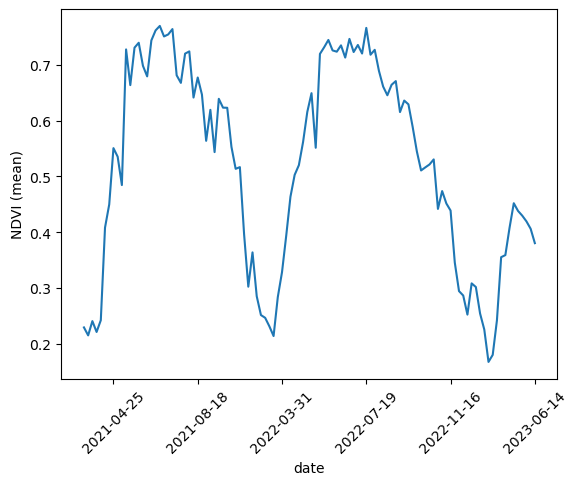

In [48]:
import matplotlib.pyplot as plt

plt.ylabel("NDVI (mean)")
statistics_processed['NDVI.mean'].plot()
plt.xticks(rotation=45)
plt.gca().invert_xaxis()
plt.show()

### Saving to csv file

In [49]:
statistics_processed.reset_index().to_csv('field_' + str(field_id) + '_NDVI_SCL_history_processed.csv', index=False)